In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Создание и нормализация обучающей, тестовой и выборки валидации

batch_size = 128

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((128, 128)),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_path = "C:/Users/das-s/Downloads/Plants Classification/train"
train_ds = datasets.ImageFolder(root=train_path, transform=transform)
train_dataloader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, pin_memory=True)

test_path = "C:/Users/das-s/Downloads/Plants Classification/test"
test_ds = datasets.ImageFolder(root=test_path, transform=transform)
test_dataloader = DataLoader(test_ds, batch_size=batch_size, shuffle=True, pin_memory=True)

validation_path = "C:/Users/das-s/Downloads/Plants Classification/val"
validation_ds = datasets.ImageFolder(root=validation_path, transform=transform)
validation_dataloader = DataLoader(validation_ds, batch_size=batch_size, shuffle=True, pin_memory=True)

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Feature batch shape: torch.Size([128, 3, 128, 128])
Labels batch shape: torch.Size([128])


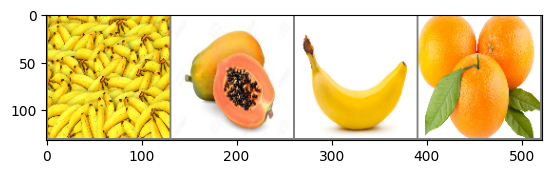

banana	 papaya	 banana	 orange	


In [5]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
images = []
for i in range(4):
    images.append(train_features[i])
imshow(torchvision.utils.make_grid(images)) # show images
print(' '.join(f'{train_ds.classes[train_labels[j]]}\t' for j in range(4))) # print labels


In [6]:
class CNN(nn.Module):
    def __init__(self, channel, num_classes):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(channel, 32, kernel_size=3),
                                    nn.BatchNorm2d(32),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3),
                                    nn.BatchNorm2d(64),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(nn.Conv2d(64, 128, kernel_size=3),
                                    nn.BatchNorm2d(128),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(nn.Conv2d(128, 256, kernel_size=3),
                                    nn.BatchNorm2d(256),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(nn.Conv2d(256, 512, kernel_size=3),
                                    nn.BatchNorm2d(512),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(512*2*2, 512),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return nn.functional.softmax(x, dim=1)

In [7]:
model = CNN(3, len(test_ds.classes))
model.to(device)

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [8]:
for i, l in test_dataloader:
    print(model(i.to(device)).shape)
    break

torch.Size([128, 9])


In [9]:
def train(model, train_dataloader, optimizer, loss_func):
    model.train()
    print('Train')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for data, labels in tqdm(train_dataloader):
        counter += 1
        data = data.to(device)
        labels = labels.to(device)

        outputs = model(data)
        # calculate the loss
        loss = loss_func(outputs, labels)
        train_running_loss += loss.item()
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    # loss and accuracy for the complete epoch
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(train_dataloader.dataset))
    return epoch_loss, epoch_acc

In [10]:
def validate(model, validation_dataloader, loss_func):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for data, labels in tqdm(validation_dataloader):
            counter += 1
            data = data.to(device)
            labels = labels.to(device)
            # forward pass
            outputs = model(data)
            # calculate the loss
            loss = loss_func(outputs, labels)
            valid_running_loss += loss.item()
            # calculate the accuracy
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()
        
    # loss and accuracy for the complete epoch
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(validation_dataloader.dataset))
    return epoch_loss, epoch_acc

In [11]:
optimizer = Adam(params=model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()
num_epochs = 30

In [12]:
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1} of {num_epochs}")
    train_epoch_loss, train_epoch_acc = train(model, train_dataloader, 
                                              optimizer, loss_func)
    valid_epoch_loss, valid_epoch_acc = validate(model, validation_dataloader,  
                                                 loss_func)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")
    print('-'*50)

Epoch 1 of 30
Train


100%|██████████| 50/50 [00:59<00:00,  1.19s/it]


Validation


100%|██████████| 8/8 [00:05<00:00,  1.55it/s]


Training loss: 1.906, training acc: 46.282
Validation loss: 1.892, validation acc: 44.778
--------------------------------------------------
Epoch 2 of 30
Train


100%|██████████| 50/50 [00:55<00:00,  1.12s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


Training loss: 1.834, training acc: 53.464
Validation loss: 1.933, validation acc: 42.778
--------------------------------------------------
Epoch 3 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.13s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Training loss: 1.808, training acc: 55.926
Validation loss: 1.855, validation acc: 48.222
--------------------------------------------------
Epoch 4 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.13s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


Training loss: 1.786, training acc: 58.437
Validation loss: 1.867, validation acc: 53.556
--------------------------------------------------
Epoch 5 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.12s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


Training loss: 1.760, training acc: 61.408
Validation loss: 1.807, validation acc: 53.556
--------------------------------------------------
Epoch 6 of 30
Train


100%|██████████| 50/50 [00:55<00:00,  1.12s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Training loss: 1.744, training acc: 62.901
Validation loss: 1.825, validation acc: 54.778
--------------------------------------------------
Epoch 7 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.13s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


Training loss: 1.746, training acc: 62.663
Validation loss: 1.779, validation acc: 56.778
--------------------------------------------------
Epoch 8 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.13s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


Training loss: 1.735, training acc: 63.298
Validation loss: 1.804, validation acc: 61.778
--------------------------------------------------
Epoch 9 of 30
Train


100%|██████████| 50/50 [00:57<00:00,  1.15s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


Training loss: 1.717, training acc: 65.348
Validation loss: 1.829, validation acc: 58.111
--------------------------------------------------
Epoch 10 of 30
Train


100%|██████████| 50/50 [00:59<00:00,  1.18s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


Training loss: 1.718, training acc: 65.412
Validation loss: 1.874, validation acc: 53.000
--------------------------------------------------
Epoch 11 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.14s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


Training loss: 1.715, training acc: 65.570
Validation loss: 1.813, validation acc: 60.000
--------------------------------------------------
Epoch 12 of 30
Train


100%|██████████| 50/50 [00:55<00:00,  1.11s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


Training loss: 1.695, training acc: 67.541
Validation loss: 1.805, validation acc: 57.111
--------------------------------------------------
Epoch 13 of 30
Train


100%|██████████| 50/50 [00:55<00:00,  1.11s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Training loss: 1.716, training acc: 65.539
Validation loss: 1.789, validation acc: 55.333
--------------------------------------------------
Epoch 14 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.13s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


Training loss: 1.690, training acc: 68.065
Validation loss: 1.756, validation acc: 62.667
--------------------------------------------------
Epoch 15 of 30
Train


100%|██████████| 50/50 [00:53<00:00,  1.07s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.89it/s]


Training loss: 1.674, training acc: 69.336
Validation loss: 1.746, validation acc: 64.000
--------------------------------------------------
Epoch 16 of 30
Train


100%|██████████| 50/50 [00:53<00:00,  1.08s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.89it/s]


Training loss: 1.639, training acc: 73.340
Validation loss: 1.802, validation acc: 57.778
--------------------------------------------------
Epoch 17 of 30
Train


100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Training loss: 1.666, training acc: 70.559
Validation loss: 1.729, validation acc: 66.222
--------------------------------------------------
Epoch 18 of 30
Train


100%|██████████| 50/50 [00:57<00:00,  1.16s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Training loss: 1.643, training acc: 72.784
Validation loss: 1.638, validation acc: 69.556
--------------------------------------------------
Epoch 19 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.14s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


Training loss: 1.640, training acc: 72.927
Validation loss: 1.673, validation acc: 68.889
--------------------------------------------------
Epoch 20 of 30
Train


100%|██████████| 50/50 [00:58<00:00,  1.17s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Training loss: 1.630, training acc: 74.229
Validation loss: 1.697, validation acc: 69.889
--------------------------------------------------
Epoch 21 of 30
Train


100%|██████████| 50/50 [00:58<00:00,  1.16s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Training loss: 1.636, training acc: 73.451
Validation loss: 1.813, validation acc: 63.778
--------------------------------------------------
Epoch 22 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.14s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


Training loss: 1.627, training acc: 74.341
Validation loss: 1.739, validation acc: 65.000
--------------------------------------------------
Epoch 23 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.14s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


Training loss: 1.625, training acc: 74.690
Validation loss: 1.677, validation acc: 68.667
--------------------------------------------------
Epoch 24 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.14s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


Training loss: 1.615, training acc: 75.755
Validation loss: 1.649, validation acc: 71.778
--------------------------------------------------
Epoch 25 of 30
Train


100%|██████████| 50/50 [00:56<00:00,  1.12s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.89it/s]


Training loss: 1.602, training acc: 76.962
Validation loss: 1.652, validation acc: 71.444
--------------------------------------------------
Epoch 26 of 30
Train


100%|██████████| 50/50 [00:54<00:00,  1.10s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


Training loss: 1.608, training acc: 76.517
Validation loss: 1.602, validation acc: 73.667
--------------------------------------------------
Epoch 27 of 30
Train


100%|██████████| 50/50 [00:54<00:00,  1.09s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


Training loss: 1.597, training acc: 77.757
Validation loss: 1.690, validation acc: 70.667
--------------------------------------------------
Epoch 28 of 30
Train


100%|██████████| 50/50 [00:54<00:00,  1.10s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


Training loss: 1.600, training acc: 76.867
Validation loss: 1.693, validation acc: 70.556
--------------------------------------------------
Epoch 29 of 30
Train


100%|██████████| 50/50 [00:54<00:00,  1.08s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.91it/s]


Training loss: 1.591, training acc: 78.217
Validation loss: 1.658, validation acc: 70.556
--------------------------------------------------
Epoch 30 of 30
Train


100%|██████████| 50/50 [00:53<00:00,  1.07s/it]


Validation


100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

Training loss: 1.600, training acc: 77.407
Validation loss: 1.628, validation acc: 70.556
--------------------------------------------------


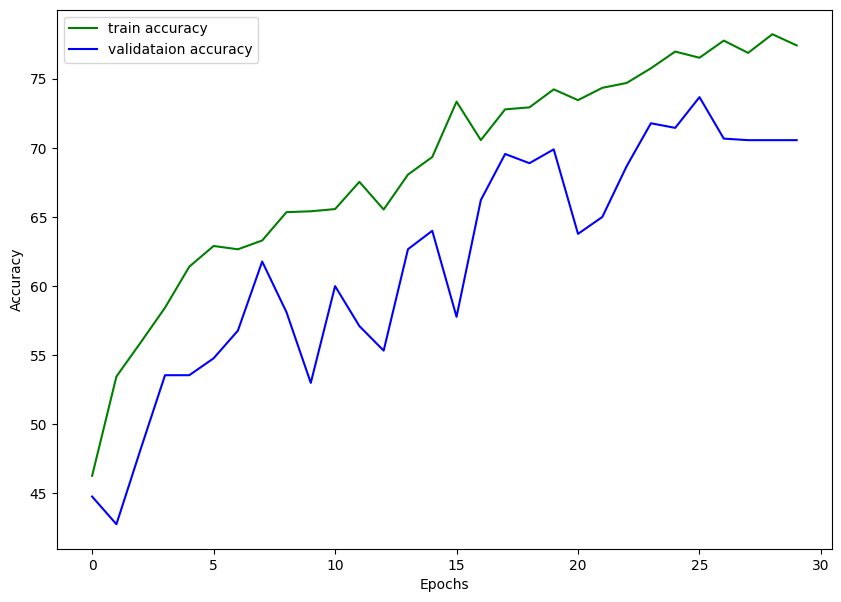

In [13]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_acc, color='green', linestyle='-', 
    label='train accuracy'
)
plt.plot(
    valid_acc, color='blue', linestyle='-', 
    label='validataion accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

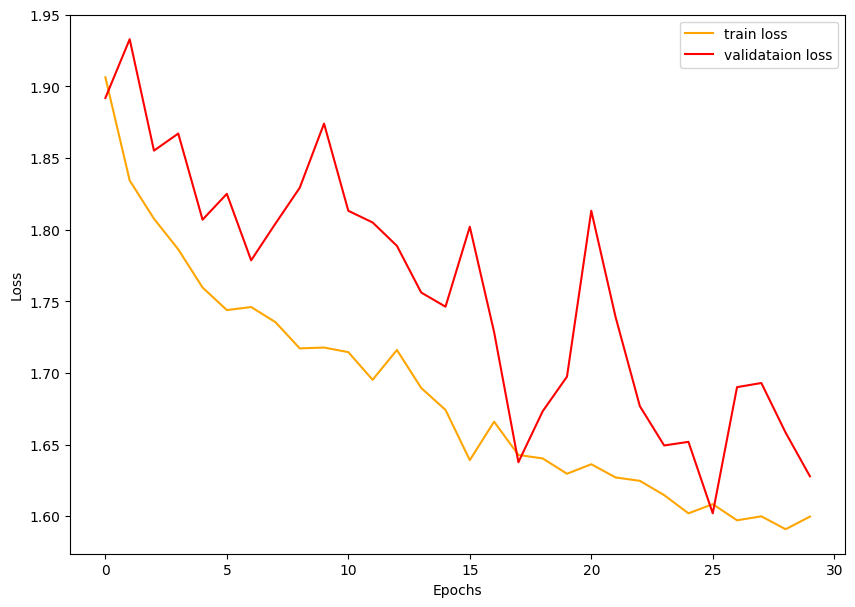

In [14]:
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_loss, color='orange', linestyle='-', 
    label='train loss')
plt.plot(
    valid_loss, color='red', linestyle='-', 
    label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

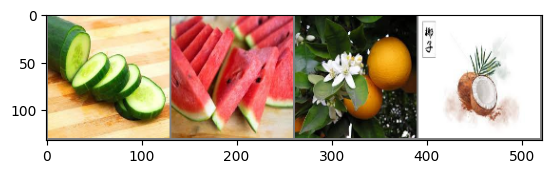

Real value:
cucumber	 watermelon	 orange	 coconut	
Predicted value:
cucumber	 watermelon	 orange	 aloevera	


In [15]:
test_fetures, test_labels = next(iter(test_dataloader))
images = []
for i in range(4):
    images.append(test_fetures[i])
imshow(torchvision.utils.make_grid(images)) # show images
print("Real value:")
print(' '.join(f'{train_ds.classes[test_labels[j]]}\t' for j in range(4))) # print labels
print("Predicted value:")
print(' '.join(f'{train_ds.classes[model(test_fetures[j].view(1, 3, 128, 128).to(device)).argmax()]}\t' for j in range(4)))

In [16]:
real_labels = []
predicted_labels = []
for data, labels in test_dataloader:
    data = data.to(device)
    output = model(data).argmax(dim=1).cpu().detach().numpy()
    for i in range(len(output)):
        predicted_labels.append(output[i])
        real_labels.append(labels[i].detach().item())

In [17]:
from sklearn.metrics import classification_report

print(classification_report(predicted_labels, real_labels, target_names=test_ds.classes))

               precision    recall  f1-score   support

     aloevera       0.77      0.67      0.71       231
       banana       0.59      0.69      0.64       170
      coconut       0.57      0.64      0.60       181
     cucumber       0.86      0.51      0.64       340
       orange       0.43      0.84      0.57       104
       papaya       0.70      0.93      0.80       150
      spinach       0.51      0.84      0.63       120
sweetpotatoes       0.87      0.69      0.77       252
   watermelon       0.95      0.76      0.85       252

     accuracy                           0.70      1800
    macro avg       0.70      0.73      0.69      1800
 weighted avg       0.75      0.70      0.70      1800

